In [360]:
# Data Source : https://storage.googleapis.com/dqlab-dataset/data_retail.csv
# Tools : Google Colaboratory & jupyter notebook
# require : Python
# Ferian Ardiansa Junardi (2023)

# Pada project ini saya melakukan analisis terhadap Customer Churn yang terjadi di salah satu toko yang menjual Baju,Sepatu,Jaket dan Tas
# tahap tahap yang saya lakukan di antaranya
# 1. Data Preparation atau persiapan data yandi dalamnya berisi mengenai data cleansing,dan tranformating
# 2. setelah data bersih maka dilakukan visualisasi data untuk mendapatkan insight dari data tersebut
# 3. setelah melakukan visualisasi selanjutnya saya mencoba untuk membuat MODEL dengan Metode LOGISTICREGRESSION
# yang di dalamnya berisi mengenai data train dan test yang akan digunakan untuk memprediksi dari data tersebut


import Dataset

In [361]:
import pandas as pd

In [362]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv',sep=';')

In [363]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


Tranforming datatype for First_Transaction and Last_Transaction columns to be  date

In [365]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000,unit='s', origin = '1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000,unit='s', origin = '1970-01-01')

In [366]:
df.dtypes

no                                     int64
Row_Num                                int64
Customer_ID                            int64
Product                               object
First_Transaction             datetime64[ns]
Last_Transaction              datetime64[ns]
Average_Transaction_Amount             int64
Count_Transaction                      int64
dtype: object

Churn Customer

In [367]:
# to check last_transactio
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


In [368]:
df.loc[df['Last_Transaction'] <= '2018-08-01','is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn'] = False

In [369]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [370]:
# del df['no']
del df['Row_Num']

Customer acquisition by year

In [371]:
import matplotlib.pyplot as plt
import datetime as dt
df.head()

,no,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [372]:
df['Year_First_Transaction']= df['First_Transaction'].dt.year
df['year_Last_Transaction']= df['Last_Transaction'].dt.year

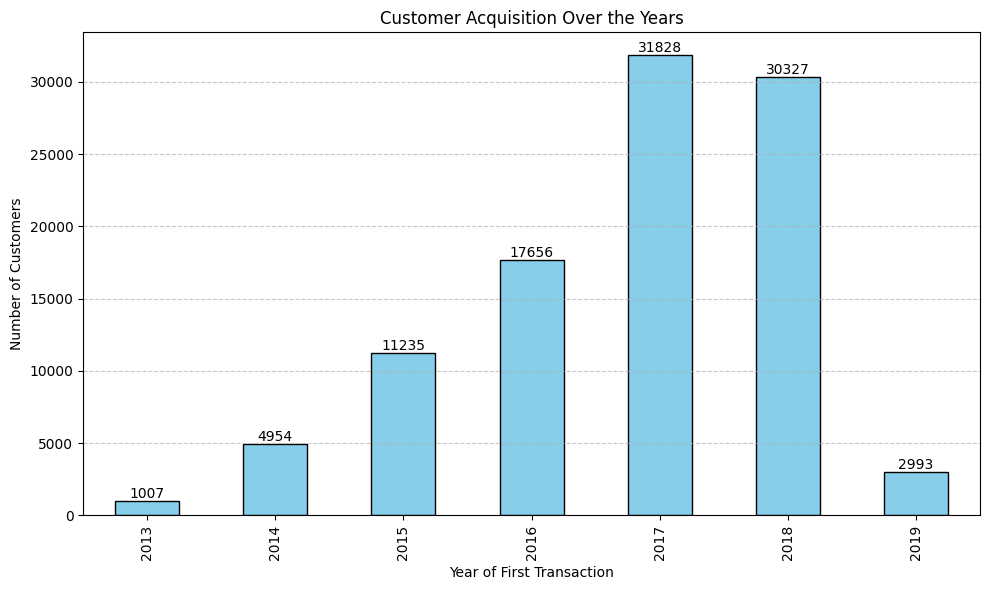

In [373]:
# count Count_Transaksi by year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

# make graph bar with different color
plt.figure(figsize=(10, 6))
df_year.plot(kind='bar', color='skyblue', edgecolor='black')

# add title and label
plt.title('Customer Acquisition Over the Years')
plt.xlabel('Year of First Transaction')
plt.ylabel('Number of Customers')

# add values to each bar
for i, value in enumerate(df_year):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## KESIMPULAN

Berdasarkan Grafik di atas berikut beberapa insights yang di dapatkan :
1. perusahaan mengalami pertumbuhun akuisisi pelanggan yang sangat signifikan , pada tahun 2013 hanya memiliki 1007 pelanggann namun pada tahun 2017 perusahaan sudah memiliki pelanggan sebanyak 31828
2. pada tahun 2018 terjadi penurunan akuisisi pelanggan, dan sampe merosot pada tahun 2019. penurunan ini bisa disebabkan oleh beberapa faktor diantaranya
*   ada pesaing baru yang muncul karena e-commerce sudah mulai berkembang





Transaction By Year

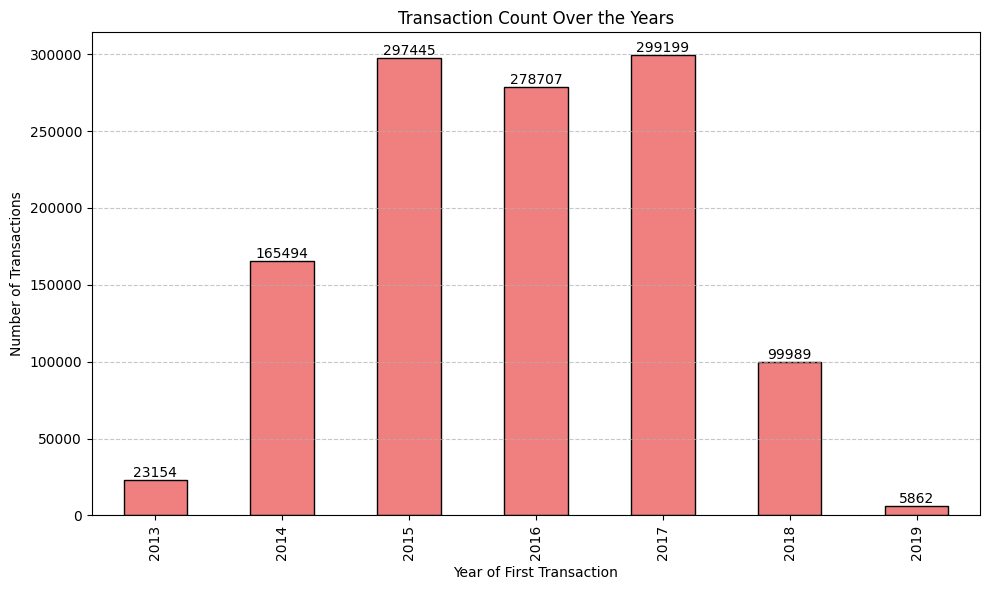

In [374]:
import matplotlib.pyplot as plt

# count Count_Transaksi by year
df_by_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()

# make graph bar with different color
plt.figure(figsize=(10, 6))
df_by_year.plot(kind='bar', color='lightcoral', edgecolor='black')

# add title and label
plt.title('Transaction Count Over the Years')
plt.xlabel('Year of First Transaction')
plt.ylabel('Number of Transactions')

# add values to each bar
for i, value in enumerate(df_by_year):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Jumlah transaksi mengalami peningkatan yang signifikan pada tahun 2017. Peningkatan ini kemungkinan disebabkan oleh beberapa faktor, seperti:

Perkembangan teknologi digital yang semakin pesat, yang memudahkan masyarakat untuk melakukan transaksi secara online.
Pertumbuhan ekonomi Indonesia yang positif, yang meningkatkan daya beli masyarakat.
Kebijakan pemerintah yang mendukung pengembangan e-commerce.
Jumlah transaksi mengalami penurunan pada tahun 2018 dan 2019. Penurunan ini kemungkinan disebabkan oleh beberapa faktor, seperti:

Persaingan yang semakin ketat di industri e-commerce.
Regulasi pemerintah yang semakin ketat, seperti aturan tentang pajak e-commerce.
Pelemahan perekonomian global, yang berdampak pada perekonomian Indonesia.


<ipython-input-375-ff7f00554515>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(),


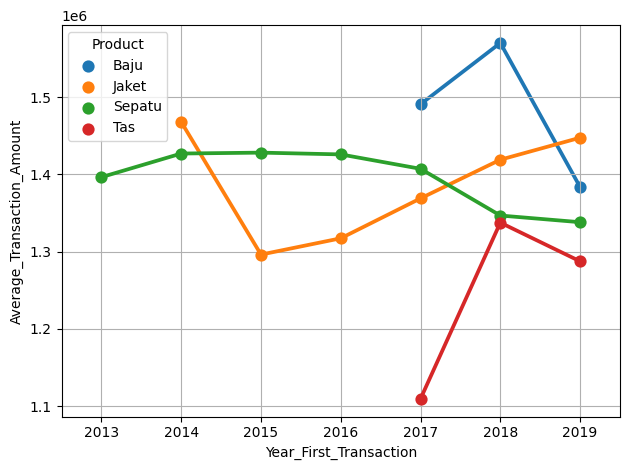

In [375]:
import seaborn as sns
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.grid()
plt.show()

In [376]:
df_piv = df.pivot_table(index = 'is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
df_piv

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


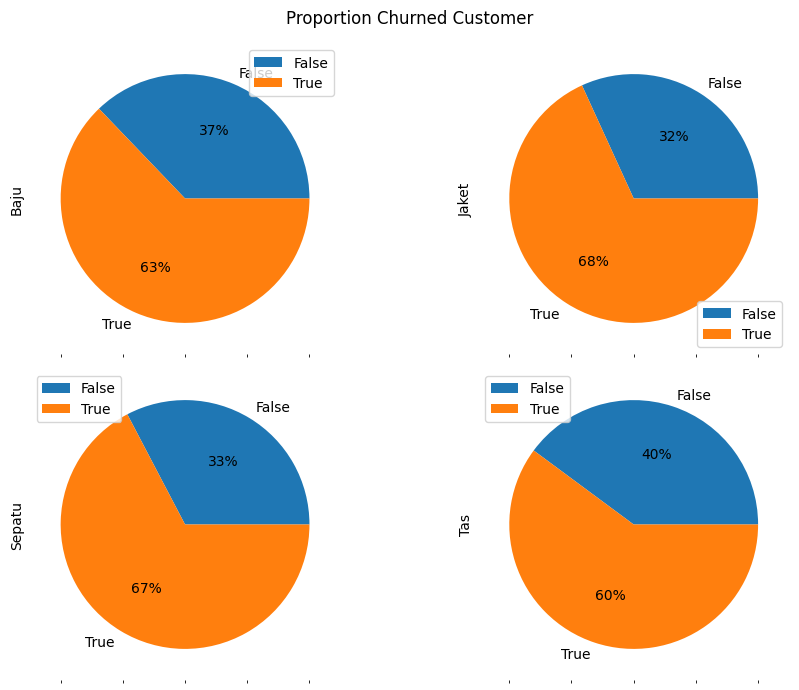

In [377]:
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
df_piv.plot.pie(subplots=True,
                figsize=(10,7),
                layout=(-1,2),
                autopct='%1.0f%%',
                title='Proportion Churned Customer')
plt.tight_layout()
plt.show()

categorize_transaction_count

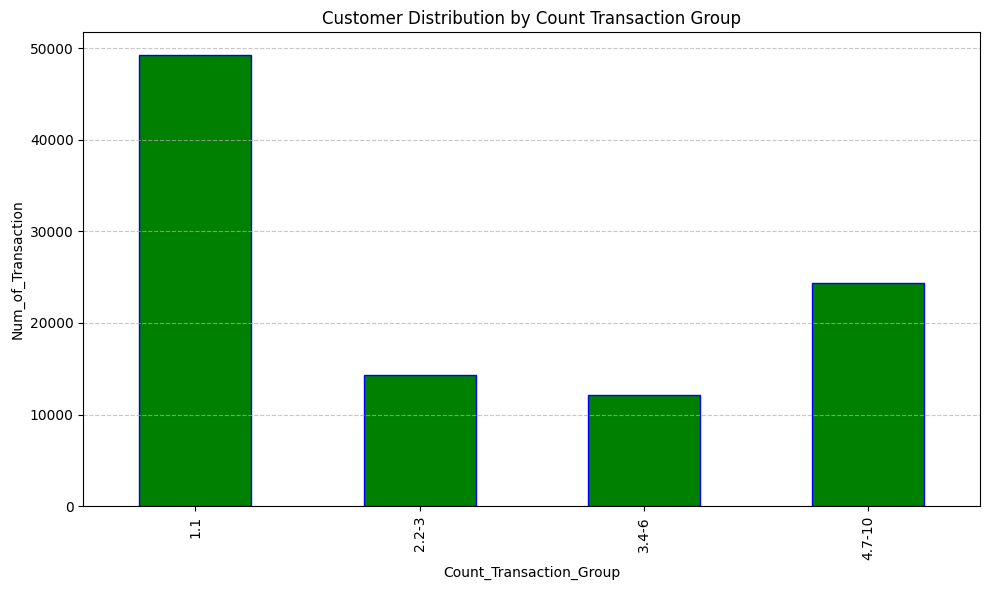

In [378]:
def categorize_transaction_count(row):
  if row['Count_Transaction'] == 1:
    val = '1.1'
  elif row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3:
    val = '2.2-3'
  elif row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6:
    val = '3.4-6'
  elif row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10:
    val = '4.7-10'
  else:
    val = '4.7-10'
  return val

df['Count_Transaction_Group'] = df.apply(categorize_transaction_count,axis=1)
plt.figure(figsize=(10,6))
df_category_transaction = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_category_transaction.plot(x='Count_Transaction_Group',y='Customer_ID',kind='bar',title='Customer Distribution by Count Transaction Group',color='green',edgecolor='blue')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Transaction')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi kategorisasi average transaction amount

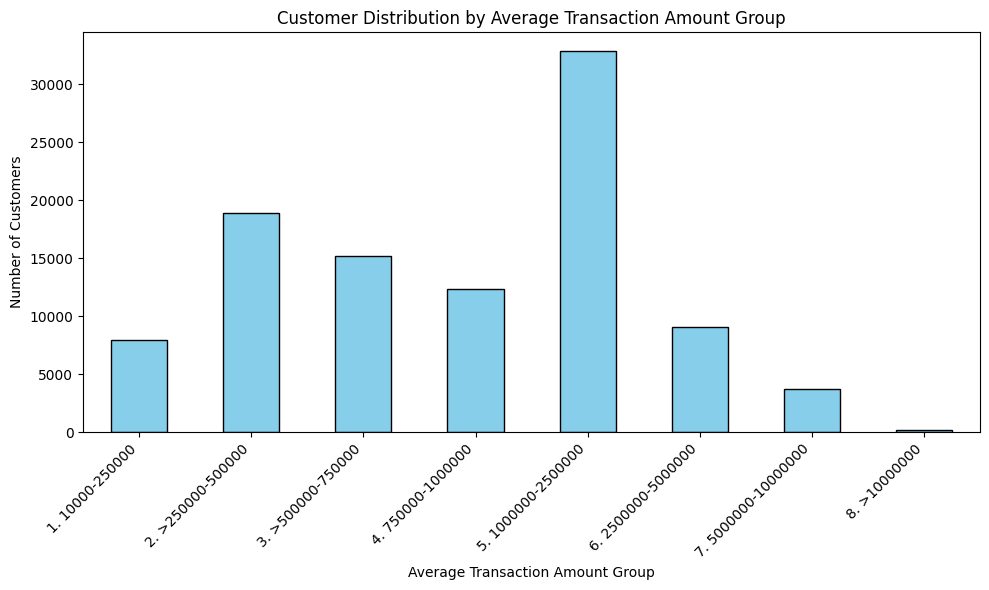

In [410]:
import matplotlib.pyplot as plt

# Fungsi untuk kategorisasi jumlah transaksi
def categorize_transaction_amount(row):
    if row['Average_Transaction_Amount'] >= 10000 and row['Average_Transaction_Amount'] <= 250000:
        return '1. 10000-250000'
    elif row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000:
        return '2. >250000-500000'
    elif row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000:
        return '3. >500000-750000'
    elif row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000:
        return '4. 750000-1000000'
    elif row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000:
        return '5. 1000000-2500000'
    elif row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000:
        return '6. 2500000-5000000'
    elif row['Average_Transaction_Amount'] >= 5000000 and row['Average_Transaction_Amount'] <= 10000000:
        return '7. 5000000-10000000'
    else:
        return '8. >10000000'

# Menerapkan fungsi untuk membuat kolom kategori
df['Average_Transaction_Amount_Group'] = df.apply(categorize_transaction_amount, axis=1)

# Menghitung jumlah pelanggan untuk setiap kelompok
df_grouped = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()

# Plot bar chart
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()


### MODELLING

In [396]:
import sklearn

In [401]:

df['Year_Diff'] = df['year_Last_Transaction']-df['Year_First_Transaction']

feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

df['is_churn'] = df['is_churn'].astype(int)
# crea variable for training and testing
X = df[feature_columns]
y = df['is_churn']



In [402]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

## Train, predict dan evaluate
Langkah selanjutnya akan membuat model menggunakan Logistic Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [404]:
# Inisiasi model logreg
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
# Predict model
y_pred = logreg.predict(X_test)
# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


## Visualisasi Confusion Matrix

In [411]:
import numpy as np

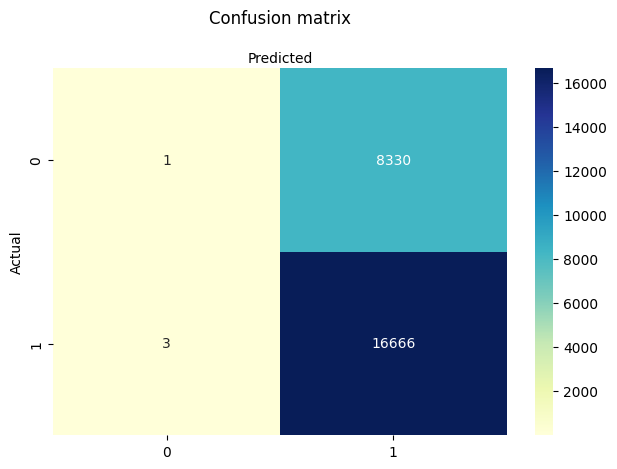

In [412]:
# name of class
class_names = [0,1]
fig,ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks,class_names)
plt.yticks(ticks_marks,class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [413]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_test,y_pred)
precision_score(y_test,y_pred,average='micro')
recall_score(y_test,y_pred,average='micro')

0.66668